# Import libraries

In [ ]:
from zipfile import ZipFile
from collections import defaultdict
from pathlib import Path
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import os
import re 
import string
from textblob import TextBlob
from bs4 import BeautifulSoup 


<ipython-input-1-8ef816bbce2f>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Data

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/train_sport.csv', sep = ';')
test = pd.read_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/test_sport.csv', sep = ';')
valid = pd.read_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/validation_sport.csv', sep = ';')

# Text Homogeneity

## Remove Whitespaces



In [ ]:
train.iloc[3]

document    Gundogan, 26, told BBC Sport he "can see the finishing line" after tearing cruciate knee ligaments in December, but will not rush his return.\nThe German missed the 2014 World Cup following back surgery that kept him out for a year, and sat out Euro 2016 because of a dislocated kneecap.\nHe said: "It is heavy mentally to accept that."\nGundogan will not be fit for the start of the Premier League season at Brighton on 12 August but said his recovery time is now being measured in "weeks" rather than months.\nHe told BBC Sport: "It is really hard always to fall and fight your way back. You feel good and feel ready, then you get the next kick.\n"The worst part is behind me now. I want to feel ready when I am fully back. I want to feel safe and confident. I don't mind if it is two weeks or six."\nGundogan made 15 appearances and scored five goals in his debut season for City following his £20m move from Borussia Dortmund.\nHe is eager to get on the field again and was impressed 

In [ ]:
print('\nRegex library:')
train['document'] = train['document'].apply(lambda x : re.sub(r'[\n\r]*', '',str(x)))
test['document'] = test['document'].apply(lambda x : re.sub(r'[\n\r]*', '',str(x)))
valid['document'] = valid['document'].apply(lambda x : re.sub(r'[\n\r]*', '',str(x)))


Regex library:


In [ ]:
train.iloc[3]

document    Gundogan, 26, told BBC Sport he "can see the finishing line" after tearing cruciate knee ligaments in December, but will not rush his return.The German missed the 2014 World Cup following back surgery that kept him out for a year, and sat out Euro 2016 because of a dislocated kneecap.He said: "It is heavy mentally to accept that."Gundogan will not be fit for the start of the Premier League season at Brighton on 12 August but said his recovery time is now being measured in "weeks" rather than months.He told BBC Sport: "It is really hard always to fall and fight your way back. You feel good and feel ready, then you get the next kick."The worst part is behind me now. I want to feel ready when I am fully back. I want to feel safe and confident. I don't mind if it is two weeks or six."Gundogan made 15 appearances and scored five goals in his debut season for City following his £20m move from Borussia Dortmund.He is eager to get on the field again and was impressed at the club's 

## Case folding


In [ ]:
train['document'] = train['document'].apply(lambda x : x.lower())
test['document'] = test['document'].apply(lambda x : x.lower())
valid['document'] = valid['document'].apply(lambda x : x.lower())

In [ ]:
train.iloc[3]

document    gundogan, 26, told bbc sport he "can see the finishing line" after tearing cruciate knee ligaments in december, but will not rush his return.the german missed the 2014 world cup following back surgery that kept him out for a year, and sat out euro 2016 because of a dislocated kneecap.he said: "it is heavy mentally to accept that."gundogan will not be fit for the start of the premier league season at brighton on 12 august but said his recovery time is now being measured in "weeks" rather than months.he told bbc sport: "it is really hard always to fall and fight your way back. you feel good and feel ready, then you get the next kick."the worst part is behind me now. i want to feel ready when i am fully back. i want to feel safe and confident. i don't mind if it is two weeks or six."gundogan made 15 appearances and scored five goals in his debut season for city following his £20m move from borussia dortmund.he is eager to get on the field again and was impressed at the club's 

## Remove Puntuaction and Symbols

In [ ]:
print("Library's punctuation: ", string.punctuation)
punctuation_list = list(string.punctuation)
punctuation_list.append('€')
punctuation_list.append('£')
print('Custom list:',punctuation_list,'\n')

Library's punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Custom list: ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '€', '£'] 



In [ ]:
def remove_punctuation(text):
  string_without_punctuation = ''
  exclude = set(punctuation_list)
  for character in text:
      if character not in exclude:
          string_without_punctuation += character
      else:
          string_without_punctuation += ' '
  return string_without_punctuation

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in punctuation_list])
    return punctuationfree

In [ ]:
train['document'] = train['document'].apply(lambda x : remove_punctuation(x))
test['document'] = test['document'].apply(lambda x : remove_punctuation(x))
valid['document'] = valid['document'].apply(lambda x : remove_punctuation(x))

In [ ]:
train.iloc[3]

document    gundogan  26  told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the 2014 world cup following back surgery that kept him out for a year  and sat out euro 2016 because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on 12 august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made 15 appearances and scored five goals in his debut season for city following his  20m move from borussia dortmund he is eager to get on the field again and was impressed at the club s 

In [ ]:
train['document'] = train['document'].apply(lambda x : x.rstrip())
test['document'] = test['document'].apply(lambda x : x.rstrip())
valid['document'] = valid['document'].apply(lambda x : x.rstrip())

In [ ]:
train.iloc[3]

document    gundogan  26  told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the 2014 world cup following back surgery that kept him out for a year  and sat out euro 2016 because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on 12 august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made 15 appearances and scored five goals in his debut season for city following his  20m move from borussia dortmund he is eager to get on the field again and was impressed at the club s 

## Remove numbers

In [ ]:
train['document'] = train['document'].apply(lambda x : re.sub(r'\d+', '', x))
test['document'] = test['document'].apply(lambda x : re.sub(r'\d+', '', x))
valid['document'] = valid['document'].apply(lambda x : re.sub(r'\d+', '', x))

In [ ]:
t = ['th', 'u']
def remove_th_u(text):
  text_no = ' '.join([word for word in text.split(' ') if word not in t])
  return text_no
  
train['document'] = train['document'].apply(lambda x : remove_th_u(x))
test['document'] = test['document'].apply(lambda x : remove_th_u(x))
valid['document'] = valid['document'].apply(lambda x : remove_th_u(x))

In [ ]:
train.iloc[3]

document    gundogan    told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the  world cup following back surgery that kept him out for a year  and sat out euro  because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on  august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made  appearances and scored five goals in his debut season for city following his  m move from borussia dortmund he is eager to get on the field again and was impressed at the club s   win over real 

## Remove repeated characters

In [ ]:
def character_repeatation(text):
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted

In [ ]:
train['document'] = train['document'].apply(lambda x : character_repeatation(x))
test['document'] = test['document'].apply(lambda x : character_repeatation(x))
valid['document'] = valid['document'].apply(lambda x : character_repeatation(x))

In [ ]:
train.iloc[3]

document    gundogan    told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the  world cup following back surgery that kept him out for a year  and sat out euro  because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on  august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made  appearances and scored five goals in his debut season for city following his  m move from borussia dortmund he is eager to get on the field again and was impressed at the club s   win over real 

## Spelling correction

In [ ]:
def correct_me(text):
  textBlb = TextBlob(text)        
  textCorrected = textBlb.correct() 
  return textCorrected

In [ ]:
train['document'] = train['document'].apply(lambda x : correct_me(x))
test['document'] = test['document'].apply(lambda x : correct_me(x))
valid['document'] = valid['document'].apply(lambda x : correct_me(x))

In [ ]:
train.iloc[3]

document    gundogan    told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the  world cup following back surgery that kept him out for a year  and sat out euro  because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on  august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made  appearances and scored five goals in his debut season for city following his  m move from borussia dortmund he is eager to get on the field again and was impressed at the club s   win over real 

## Remove links

In [ ]:
def remove_links(text):
  remove_https = re.sub(r'http\S+', ' ', text)
  remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
  return remove_com

In [ ]:
train['document'] = train['document'].apply(lambda x : remove_links(x))
test['document'] = test['document'].apply(lambda x : remove_links(x))
valid['document'] = valid['document'].apply(lambda x : remove_links(x))

In [ ]:
train.iloc[3]

document    gundogan    told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the  world cup following back surgery that kept him out for a year  and sat out euro  because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on  august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made  appearances and scored five goals in his debut season for city following his  m move from borussia dortmund he is eager to get on the field again and was impressed at the club s   win over real 

## Remove emoji

In [ ]:
!pip install emoji
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=3770e0991da152240791cadf21ec4e210efe2a09ef23dce51605eda62e257f2a
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 3.7 MB/s eta 0:00:00


In [ ]:
import emoji
import demoji

train['document'] = train['document'].apply(lambda x : demoji.findall(x))
test['document'] = test['document'].apply(lambda x : demoji.findall(x))
valid['document'] = valid['document'].apply(lambda x : demoji.findall(x))

0        {}
1        {}
2        {}
3        {}
4        {}
         ..
87619    {}
87620    {}
87621    {}
87622    {}
87623    {}
Name: INTRODUCTION, Length: 87624, dtype: object

## Remove HTML tags

In [ ]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


In [ ]:
train['document'] = train['document'].apply(lambda x : strip_html_tags(x))
test['document'] = test['document'].apply(lambda x : strip_html_tags(x))
valid['document'] = valid['document'].apply(lambda x : strip_html_tags(x))

In [ ]:
train.iloc[3]

document    gundogan    told bbc sport he  can see the finishing line  after tearing cruciate knee ligaments in december  but will not rush his return the german missed the  world cup following back surgery that kept him out for a year  and sat out euro  because of a dislocated kneecap he said   it is heavy mentally to accept that  gundogan will not be fit for the start of the premier league season at brighton on  august but said his recovery time is now being measured in  weeks  rather than months he told bbc sport   it is really hard always to fall and fight your way back  you feel good and feel ready  then you get the next kick  the worst part is behind me now  i want to feel ready when i am fully back  i want to feel safe and confident  i don t mind if it is two weeks or six  gundogan made  appearances and scored five goals in his debut season for city following his  m move from borussia dortmund he is eager to get on the field again and was impressed at the club s   win over real 

## Remove double spaces

In [ ]:
train['document'] = train['document'].apply(lambda x : re.sub(' +', ' ',str(x)))
test['document'] = test['document'].apply(lambda x : re.sub(' +', ' ',str(x)))
valid['document'] = valid['document'].apply(lambda x : re.sub(' +', ' ',str(x)))


In [ ]:
train.iloc[3]

document    gundogan told bbc sport he can see the finishing line after tearing cruciate knee ligaments in december but will not rush his return the german missed the world cup following back surgery that kept him out for a year and sat out euro because of a dislocated kneecap he said it is heavy mentally to accept that gundogan will not be fit for the start of the premier league season at brighton on august but said his recovery time is now being measured in weeks rather than months he told bbc sport it is really hard always to fall and fight your way back you feel good and feel ready then you get the next kick the worst part is behind me now i want to feel ready when i am fully back i want to feel safe and confident i don t mind if it is two weeks or six gundogan made appearances and scored five goals in his debut season for city following his m move from borussia dortmund he is eager to get on the field again and was impressed at the club s win over real madrid in a pre season game 

# Normalization


## Remove Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  text_no = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text_no

In [ ]:
train['document'] = train['document'].apply(lambda x : remove_stopwords(x))
test['document'] = test['document'].apply(lambda x : remove_stopwords(x))
valid['document'] = valid['document'].apply(lambda x : remove_stopwords(x))

In [ ]:
train.iloc[3]

document    gundogan told bbc sport see finishing line tearing cruciate knee ligaments december rush return german missed world cup following back surgery kept year sat euro dislocated kneecap said heavy mentally accept gundogan fit start premier league season brighton august said recovery time measured weeks rather months told bbc sport really hard always fall fight way back feel good feel ready get next kick worst part behind want feel ready fully back want feel safe confident mind two weeks six gundogan made appearances scored five goals debut season city following move borussia dortmund eager get field impressed club win real madrid pre season game los angeles wednesday manager pep guardiola made five new signings already summer continues interest arsenal forward alexis sanchez monaco kylian mbappe gundogan said optimism season big huge definitely felt last year well completely new experience us know premier league bit wait season start city complete three match tour united states 

## Bigrammi e Trigrammi

In [ ]:
import gensim
from gensim import utils
from gensim import models

In [ ]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))            #deacc=True removes punctuations

In [ ]:
data = train['document'].values.tolist()
data_words = list(sent_to_words(data))

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
i = 0
train['doc_bigram'] = None
for el in bigram_mod[data_words]:
  train['doc_bigram'][i] = el
  i += 1

<ipython-input-65-74a6d5852098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['doc_bigram'][i] = el


In [ ]:
i = 0
train['doc_trigram'] = None
for el in trigram_mod[data_words]:
  train['doc_trigram'][i] = el
  i += 1

<ipython-input-66-73f3dd5c068e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['doc_trigram'][i] = el


In [ ]:
train.iloc[3]

document       [gundogan, told, bbc, sport, see, finishing, line, tearing, cruciate, knee, ligaments, december, rush, return, german, missed, world, cup, following, back, surgery, kept, year, sat, euro, dislocated, kneecap, said, heavy, mentally, accept, gundogan, fit, start, premier, league, season, brighton, august, said, recovery, time, measured, weeks, rather, months, told, bbc, sport, really, hard, always, fall, fight, way, back, feel, good, feel, ready, get, next, kick, worst, part, behind, want, feel, ready, fully, back, want, feel, safe, confident, mind, two, weeks, six, gundogan, made, appearances, scored, five, goals, debut, season, city, following, move, borussia, dortmund, eager, get, field, impressed, club, win, real, madrid, ...]                                                                                                                                                                         
summary        Manchester City midfielder Ilkay Gundogan says it has been men

In [ ]:
data_val = valid['document'].values.tolist()
data_words_val = list(sent_to_words(data_val))

bigram_val = gensim.models.Phrases(data_words_val, min_count=5, threshold=10) 
trigram_val = gensim.models.Phrases(bigram_val[data_words_val], threshold=10)

bigram_mod_val = gensim.models.phrases.Phraser(bigram_val)
trigram_mod_val = gensim.models.phrases.Phraser(trigram_val)

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
i = 0
valid['doc_bigram'] = None
for el in bigram_mod_val[data_words_val]:
  valid['doc_bigram'][i] = el
  i += 1

In [ ]:
i = 0
valid['doc_trigram'] = None
for el in trigram_mod_val[data_words_val]:
  valid['doc_trigram'][i] = el
  i += 1

# Tokenization

In [ ]:
def tokenization(text):
    tokens = re.split('\W+',str(text))
    return tokens

In [ ]:
train['document'] = train['document'].apply(lambda x : tokenization(x))
test['document'] = test['document'].apply(lambda x : tokenization(x))
valid['document'] = valid['document'].apply(lambda x : tokenization(x))

In [ ]:
train.iloc[3]

document       [gundogan, told, bbc, sport, see, finishing, line, tearing, cruciate, knee, ligaments, december, rush, return, german, missed, world, cup, following, back, surgery, kept, year, sat, euro, dislocated, kneecap, said, heavy, mentally, accept, gundogan, fit, start, premier, league, season, brighton, august, said, recovery, time, measured, weeks, rather, months, told, bbc, sport, really, hard, always, fall, fight, way, back, feel, good, feel, ready, get, next, kick, worst, part, behind, want, feel, ready, fully, back, want, feel, safe, confident, mind, two, weeks, six, gundogan, made, appearances, scored, five, goals, debut, season, city, following, move, borussia, dortmund, eager, get, field, impressed, club, win, real, madrid, ...]                                                                                                                                                                         
summary        Manchester City midfielder Ilkay Gundogan says it has been men

## Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

In [ ]:
train['document'] = train['document'].apply(lambda x : lemmatizer(x))
test['document'] = test['document'].apply(lambda x : lemmatizer(x))
valid['document'] = valid['document'].apply(lambda x : lemmatizer(x))


In [ ]:
train.iloc[3]

document       [gundogan, told, bbc, sport, see, finishing, line, tearing, cruciate, knee, ligament, december, rush, return, german, missed, world, cup, following, back, surgery, kept, year, sat, euro, dislocated, kneecap, said, heavy, mentally, accept, gundogan, fit, start, premier, league, season, brighton, august, said, recovery, time, measured, week, rather, month, told, bbc, sport, really, hard, always, fall, fight, way, back, feel, good, feel, ready, get, next, kick, worst, part, behind, want, feel, ready, fully, back, want, feel, safe, confident, mind, two, week, six, gundogan, made, appearance, scored, five, goal, debut, season, city, following, move, borussia, dortmund, eager, get, field, impressed, club, win, real, madrid, ...]                                                                                                                                                                               
summary        Manchester City midfielder Ilkay Gundogan says it has been men

# Export dataframe

In [ ]:
train.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/train_sport_tok_lem.csv', sep = ';', index=False)
test.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/test_sport_tok_lem.csv', sep = ';', index=False)
valid.to_csv('/content/gdrive/MyDrive/Text Mining Exam/X-Sum/Data/validation_sport_tok_lem.csv', sep = ';', index=False)

# Grafico distribuzione

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
l = train.groupby('category', as_index=False).count()
l = l[l['document']>1]
l = l['category'].unique().tolist()
l.remove('0')

train1 = train[train['category'].isin(l)]

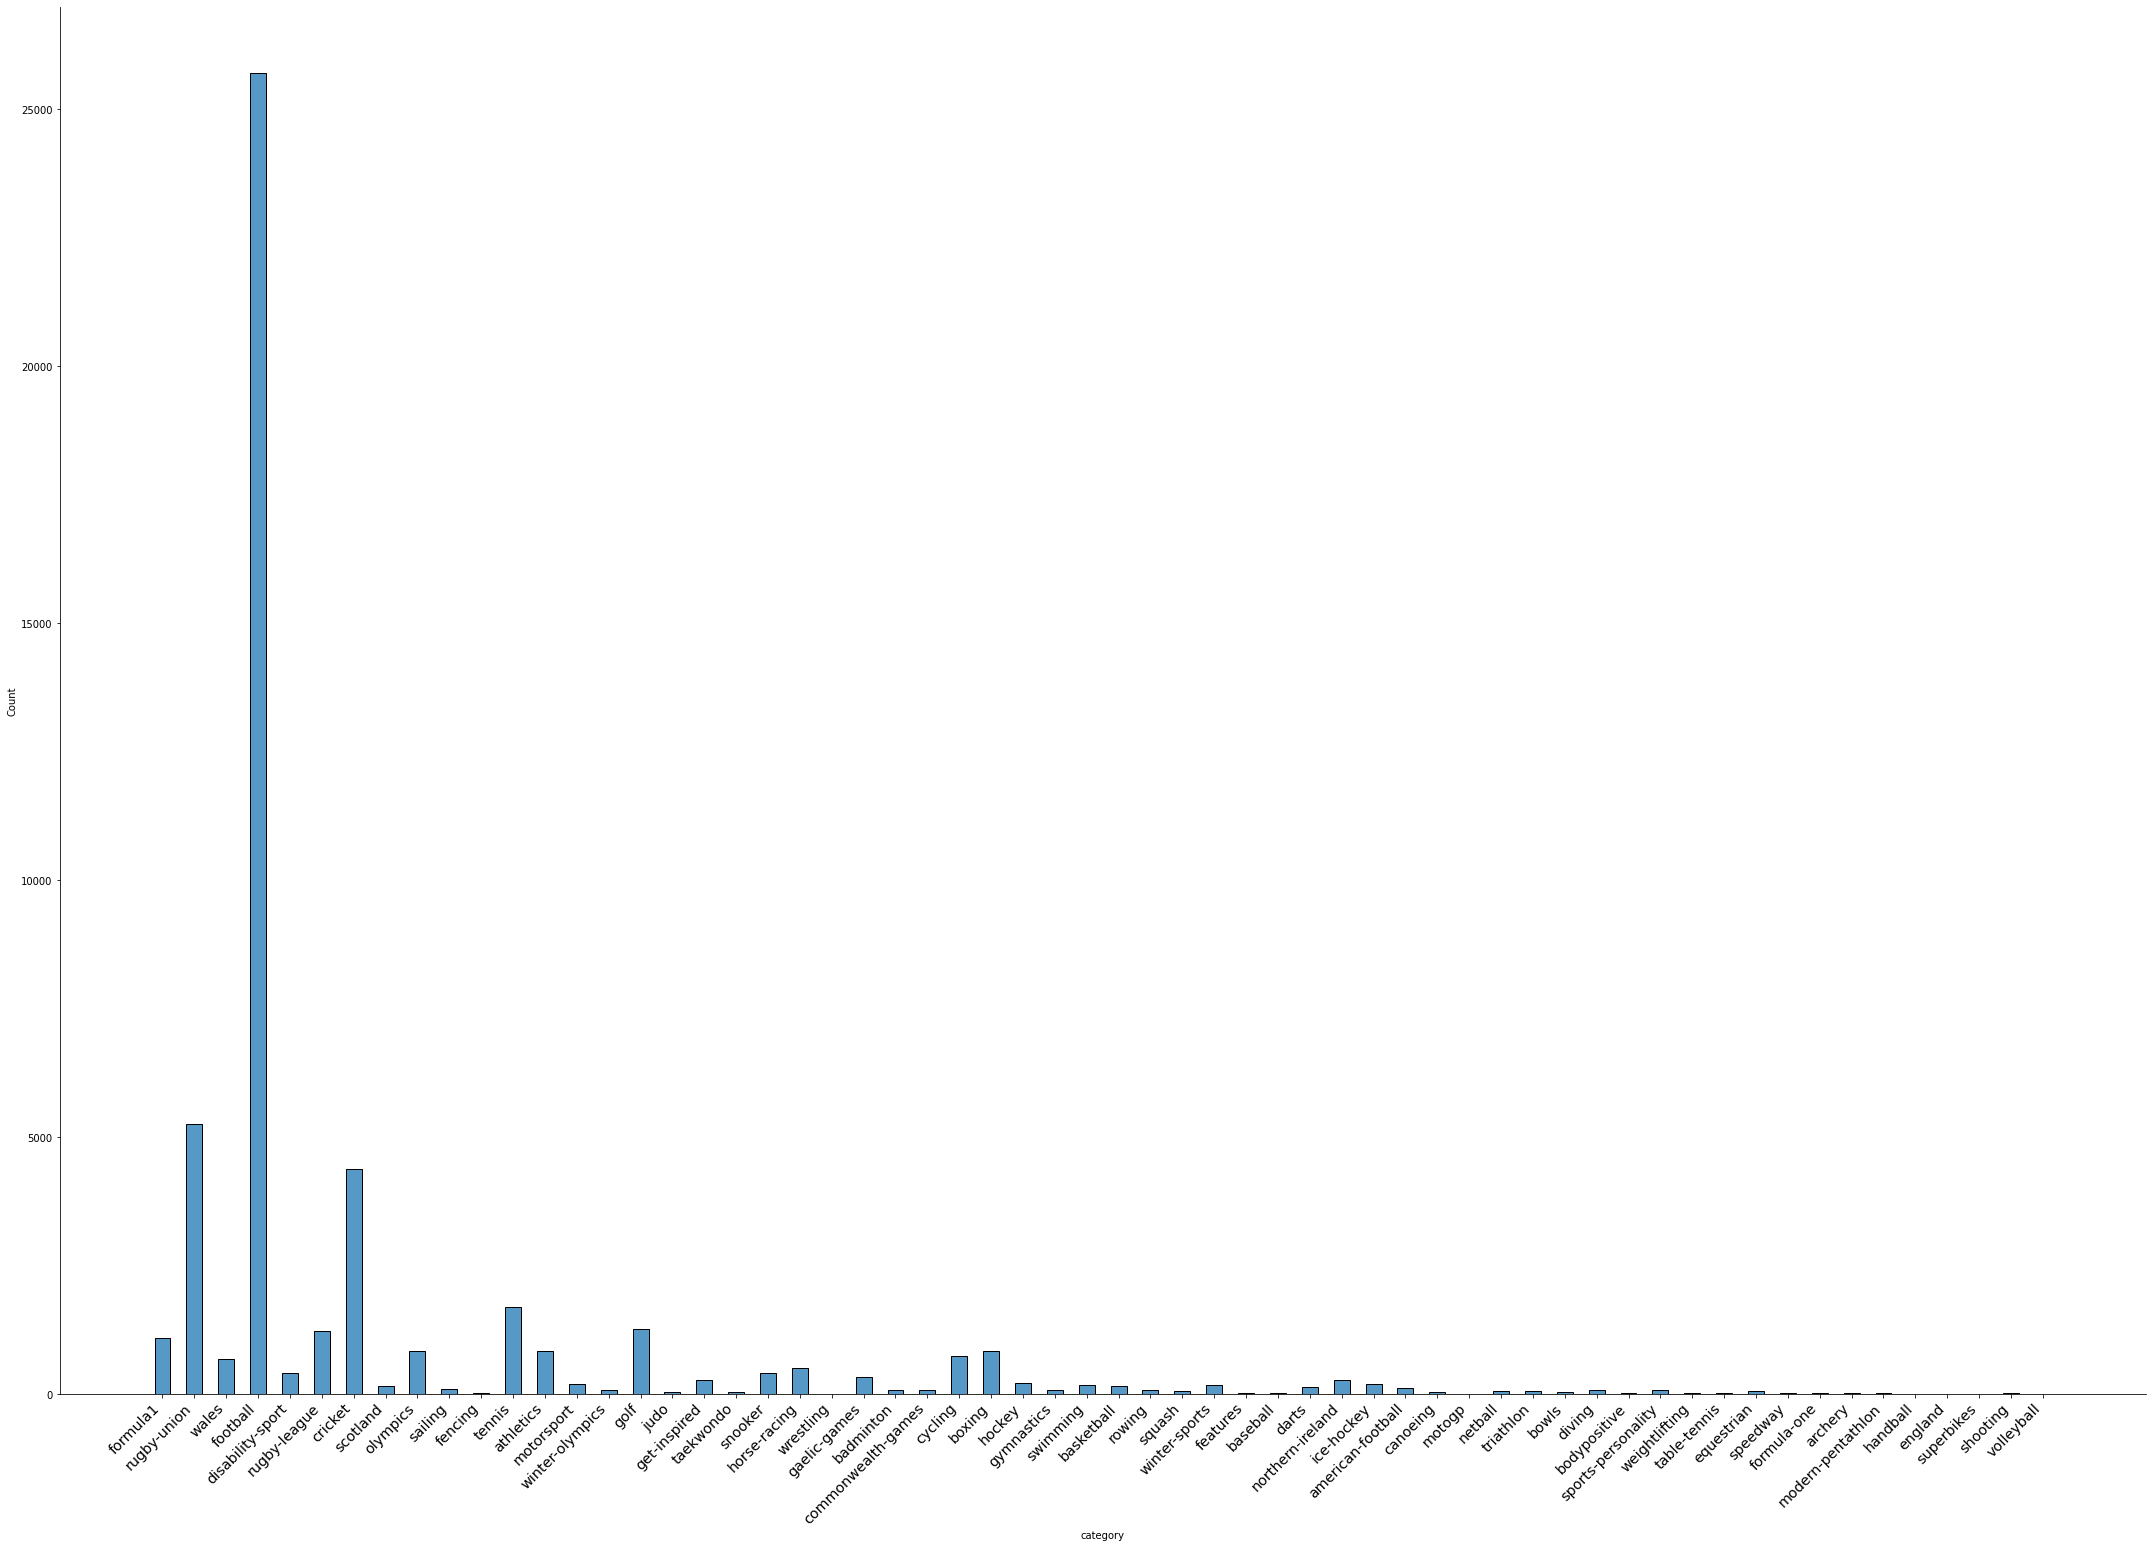

In [ ]:
chart = sns.displot(train1, x="category", height = 20, aspect = 1.5, shrink=0.5, palette = 'tab10')
chart.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')


# WORDCLOUD

In [ ]:
from wordcloud import WordCloud

In [ ]:
l = []
for el in train['document']:
  l.append(el)

flat_list = [item for sublist in l for item in sublist]


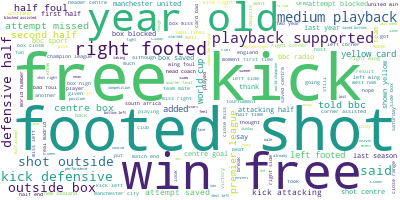

In [ ]:
unique_string=(" ").join(flat_list)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(unique_string)

wordcloud.to_image()

In [ ]:
wordcloud.words_

{'free kick': 1.0,
 'footed shot': 0.8075737560546015,
 'win free': 0.8041546869738648,
 'year old': 0.5723832465615044,
 'right footed': 0.5567384153132852,
 'playback supported': 0.46455306032584764,
 'medium playback': 0.45691195897117104,
 'defensive half': 0.3770300722666874,
 'kick defensive': 0.37700417022819693,
 'outside box': 0.3756313621882042,
 'said': 0.37532053772631907,
 'shot outside': 0.3707358769135131,
 'attempt missed': 0.36651384463957315,
 'half foul': 0.3419328101121558,
 'premier league': 0.3342917087574792,
 'second half': 0.3167819307379491,
 'centre box': 0.311705131193825,
 'told bbc': 0.307483098919885,
 'left footed': 0.2727484653042194,
 'added': 0.2635014375631362,
 'world cup': 0.26104074390654547,
 'yellow card': 0.25277799362809855,
 'attempt saved': 0.23384360349159478,
 'kick attacking': 0.22990649364104956,
 'attacking half': 0.22990649364104956,
 'shown yellow': 0.21900173543657886,
 'box saved': 0.2173440049731914,
 'last season': 0.2150905276245